In [1]:
import pandas as pd
import numpy as np

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# preparing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# turn off pink warning boxes for demo
import warnings
warnings.filterwarnings("ignore")

# acquire
from explore import anatomy_of_a_figure
from env import host, user, password
from pydataset import data

# Classification

___

### <font color=red>What is Classification?</font>

**Classification is a Supervised Machine Learning technique.**  Classification, like Regression, uses labeled data from a training dataset to learn rules for making future predictions on unseen data. However, **Classification is used to predict the category membership of the categorical target value or label.** For Classification algorithms, you determine the probability of an observation to be part of a certain class or not. Therefore, you express the probability with a value between 0 and 1. A probability close to 1 means the observation is very likely to be part of a group or category.

**Simply put, Regression predicts a continuous variable while classification predicts a categorical variable.**

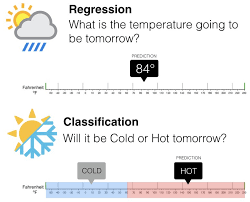

___

### <font color=orange>So What Are the Types of Classification?</font>

**Types of Classification**

>**Binary Classification -** This type of classification uses a decision rule to predict an observation to be a member of one of only two groups: churn/not churn, pass/fail, male/female, smoker/non-smoker, healthy/sick.

>**Multiclass Classification -** This type of classification uses a decision rule to predict an observation to be a member of one of three or more possible groups or categories: A/B/C, hot/warm/cold, Python/Java/C++/Go/C

![image.png](https://developers.google.com/machine-learning/guides/text-classification/images/LastLayer.png)

**Uses for Classification**

- Medical Diagnosis


- Spam Detection


- Credit Approval


- Targeted Marketing

___

### <font color=green>Now What?</font>

Check out [this article](https://towardsdatascience.com/the-complete-guide-to-classification-in-python-b0e34c92e455) on Classification and Logistic Regression. Glean what is helpful to you, and don't feel like you need to understand anything we haven't covered yet unless you are so interested.

We will work through the data science pipeline focused on preparing for Classification Modeling.

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## Acquire

**<font color=green>A Few Example Methods for Reading Data into Pandas DataFrames</font>**

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

### From a Database

Create your DataFrame using a SQL query to access a database.

**<font color=purple>Use your env file info and create your sql query and create connection_url for use in pandas `read_sql()` function.</font>**

```python
# Import private info to keep it secret in public files.
from env import host, password, user

# Test query in Sequel Pro and save to a variable.
sql_query = 'write your sql query here; test it in Sequel Pro first!'

# Save connection url to a variable for use with pandas `read_sql()` function.
connection_url = f'mysql+pymysql://{user}:{password}@{host}/database_name'
    
# Python function to read data from database into a DataFrame.
pd.read_sql(sql_query, connection_url)
```

In [2]:
# Create sql query and save to variable.

sql_query = 'SELECT * FROM passengers'

In [3]:
# Create connection url and save to a variable.

connection_url = f'mysql+pymysql://{user}:{password}@{host}/titanic_db'

In [4]:
# Use my variables in the pandas read_sql() function.

titanic_df = pd.read_sql(sql_query, connection_url)
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1


**<font color=purple>Put it all together in a single function that acquires new data from the Codeup database and save it, as well as any helper functions, in your `acquire.py` file.</font>**

```python
# Create helper function to get the necessary connection url.
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

# Use the above helper function and a sql query in a single function.
def get_db_data():
    '''
    This function reads data from the Codeup db into a df.
    '''
    sql_query = 'write your sql query here; test it in Sequel Pro first!'
    return pd.read_sql(sql_query, get_connection('database_name'))
```

In [5]:
# Let's create a helper function that creates our connection url.

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [6]:
def get_titanic_data():
    '''
    This function reads in the titanic data from the Codeup db
    and returns a pandas DataFrame with all columns.
    '''
    sql_query = 'SELECT * FROM passengers'
    return pd.read_sql(sql_query, get_connection('titanic_db'))

In [7]:
titanic_df = get_titanic_data()
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1


___

### From Files

- Create your DataFrame from a csv file.

```python
df = pd.read_csv('file_path/file_name.csv')
```
- Create your DataFrame from an AWS S3 file.

```python
df = pd.read_csv('https://s3.amazonaws.com/bucket_and_or_file_name.csv')
```

- Create your DataFrame from a Google sheet using its Share url.

```python
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
```  

```python
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
```

```python
df = pd.read_csv(csv_export_url)
```

In [8]:
# Assign our Google Sheet share url to a variable.

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [9]:
# Use the replace method to modify our url, so we can export it.

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [10]:
# Use read_csv() method to create our DataFrame.

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C


___

### From Your Clipboard

Read copy-pasted tabular data and parse it into a DataFrame.

```python
pd.read_clipboard(header=None, names=colums)
```

[Here's](https://towardsdatascience.com/pandas-hacks-read-clipboard-94a05c031382) a short and sweet article that explains it all nicely.

___

### From an Excel Sheet

```python
pd.read_excel('your_excel_file_name.xlsx', sheet_name='your_table_name', usecols=['this_one', 'this_one'])
```

In [11]:
# Read in one sheet from my_telco_churn excel workbook.

customers_df = pd.read_excel('my_telco_churn.xlsx', sheet_name='Table2_CustDetails')
customers_df.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,tenure,churn
0,7569-NMZYQ,Female,0,Yes,Yes,2,2,2,Bank transfer (automatic),118.75,8672.45,73.031158,No
1,8984-HPEMB,Female,0,No,No,2,2,2,Electronic check,118.65,8477.60,71.450485,No
2,5734-EJKXG,Female,0,No,No,2,2,1,Electronic check,118.60,7365.70,62.105396,No


___

### From Pydataset

Create your DataFrame using Pydataset and Read the Doc.

```python
from pydataset import data

data('iris', show_doc=True)

df_iris = data('iris')
```

In [12]:
# Create DataFrame using pydataset 'iris'

df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [13]:
# Using Seaborn Datasets

iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


___

### From Sklearn Datasets

Create your DataFrame using Sklearn Datasets.

In [14]:
# Using Sklearn Datasets, dictionary-like object

from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [15]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [17]:
iris_df['species'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**More on sklearn dataset loading utilities [here](https://scikit-learn.org/stable/datasets/index.html)**

**Seaborn Datasets you can use are linked [here](https://github.com/mwaskom/seaborn-data)**

<hr style="border-top: 10px groove goldenrod; margin-top: 1px; margin-bottom: 1px"></hr>

## Prepare

This notebook will have an Imputing and Encoding focus. In Regression, I will focus more on scaling.

<hr style="border-top: 10px groove goldenrod; margin-top: 1px; margin-bottom: 1px"></hr>

### **<font color=red>What are Data Imputation and Data Encoding?</font>**

**Imputation** is the process of replacing missing data with substituted values. You might choose to impute the mean, median, or mode of a given column to fill any holes or cells with missing data. Maybe you want to do something a little more complex like use a linear regression model to predict the missing values that you will impute. Depending on the situation, you might just decide to drop rows or columns that have more than a certain percentage of missing values. Whatever you decide to do, you first need to inspect your dataset for Null values.

**Encoding** is when you convert a string to an integer representation making a categorical value useable in a ML model.

**<font color=purple>I'll demonstrate a few different techniques to handle these tasks below.</font>**

___

### **<font color=orange>So What Are They For?</font>**

**Both imputing and encoding our data is part of preparing it for use in Machine Learning models.**

The simplest way to encode a categorical variable is with the pandas function `pd.get_dummies()`, so we'll look at that first. I perform this manipulation before I split. This is a great technique to start with and perfect place to build your understanding of encoding data.

**The encoding techniques below are performed after I split my data, so I will demonstrate them later in the notebook.**

Encoding with `LabelEncoder()` converts each unique value in your chosen column into an integer representing the original categorical value. **This technique is useful when there is meaning to the order of your categorical values, or in other words, for ordinal values..**

One-hot Encoding is when we create a new column for each value in the oringinal column we wish to encode. Each observation in our DataFrame will have either a 0 or a 1 to indicate which of the new columns represents its value in the original column. **This is useful when the order of your categorical values does not carry meaning, or in other words, for nominal values.** Beware of the curse of dimensionality when using One-hot; it can quickly increase the number of columns, and therfore complexity, of your model exponentially.

Take a deeper look at these various techniques [in this arcticle](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd) and [in this beginner's guide to encoding data](https://towardsdatascience.com/beginners-guide-to-encoding-data-5515da7f56ab).

___

### **<font color=green>Now What?</font>**

**Let's take a look at our data and decide what variables may need imputing, encoding, or just dropped. I might also decide to create new columns in prepare.**

#### `.map()` to Create Column

I'm adding a column here, `is_female`, and demonstrating how I could do that using `df.map()`.

In [18]:
titanic_df['is_female'] = titanic_df.sex.map({'female': 1, 'male': 0})

titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,is_female
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,1
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1,1


___

#### `.isna()` and `.isnull()`

I'll quickly check my dataset for missing values:

>**<font color=purple>Here's a cool way to use a heatmap to visualize Null values in your dataset.</font>**

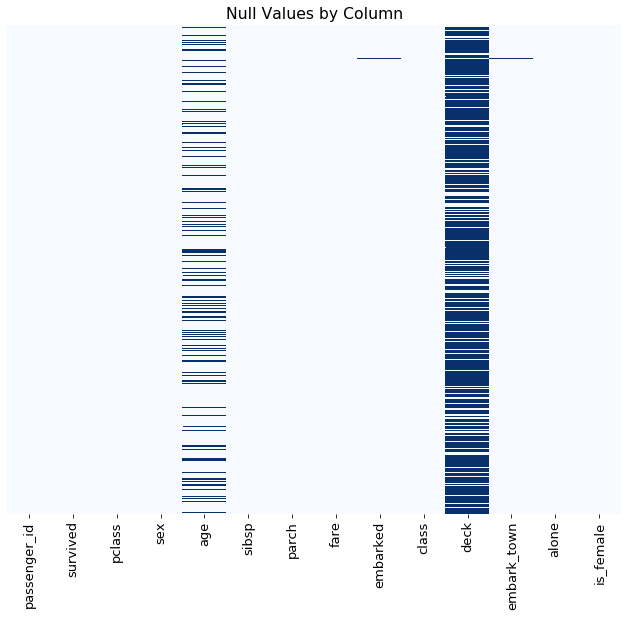

In [19]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column')
plt.show()

**Examine total missing values by column; this can help me make some decisions about imputing and dropping.**

In [20]:
titanic_df.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
is_female         0
dtype: int64

**Examine percent of missing values by column; I can begin to decide how to handle my missing values based on this.**

In [21]:
round(titanic_df.isna().mean() * 100, 2)

passenger_id     0.00
survived         0.00
pclass           0.00
sex              0.00
age             19.87
sibsp            0.00
parch            0.00
fare             0.00
embarked         0.22
class            0.00
deck            77.22
embark_town      0.22
alone            0.00
is_female        0.00
dtype: float64

**I can check any missing values by subgroups if I really want to dig down.**

In [22]:
titanic_df.groupby(['survived', 'pclass', 'sex']).agg(lambda s: s.isna().sum())

passenger_id   age  sibsp  parch  fare  embarked  \
survived pclass sex                                                        
0        1      female             0   0.0      0      0   0.0         0   
                male               0  16.0      0      0   0.0         0   
         2      female             0   0.0      0      0   0.0         0   
                male               0   7.0      0      0   0.0         0   
         3      female             0  17.0      0      0   0.0         0   
                male               0  85.0      0      0   0.0         0   
1        1      female             0   9.0      0      0   0.0         2   
                male               0   5.0      0      0   0.0         0   
         2      female             0   2.0      0      0   0.0         0   
                male               0   2.0      0      0   0.0         0   
         3      female             0  25.0      0      0   0.0         0   
                male               0   9.0      0      0   0.0         0   

                        class  deck  embark_town  alone  is_female  
survived pclass sex                                                 
0        1      female      0     0            0      0          0  
                male        0    22            0      0          0  
         2      female      0     5            0      0          0  
                male        0    89            0      0          0  
         3      female      0    70            0      0          0  
                male        0   296            0      0          0  
1        1      female      0    13            2      0          0  
                male        0     6            0      0          0  
         2      female      0    61            0      0          0  
                male        0    13            0      0          0  
         3      female      0    68            0      0          0  
                male        0    45            0      0          0

___

#### Encoding Technique Before Splitting

##### `pd.get_dummies()` 

Remeber that I perform this manipulation here before I split my data. This is a simple way to encode categorical variables, and we will look at some more sophisticated techniques a bit farther down.

In [23]:
# First I create a new dataframe that holds my encoded columns.

embarked_dummies = pd.get_dummies(titanic_df.embarked, drop_first=True)
embarked_dummies.sample(5)

,Q,S
40,0,1
280,1,0
420,0,0
809,0,1
23,0,1


In [24]:
# Then I add my encoded columns back onto my original dataframe.

titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)

In [25]:
titanic_df.sample(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,is_female,Q,S
257,257,1,1,female,30.0,0,0,86.5000,S,First,B,Southampton,1,1,0,1
692,692,1,3,male,NaN,0,0,56.4958,S,Third,None,Southampton,1,0,0,1


___

##### `.drop()`

If I'm going to drop any columns or rows, I can do it right here before the split. There are some categorical columns I'm not dropping because I want to use them in explore. I'm choosing to keep my dataframe exploration-friendly, and I can curate columns for modeling later.

In [26]:
titanic_df = titanic_df.drop(columns=['deck', 'passenger_id', 'embarked'])
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   class        891 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    int64  
 10  is_female    891 non-null    int64  
 11  Q            891 non-null    uint8  
 12  S            891 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(2)
memory usage: 78.4+ KB


___

## Split Your Data

**<font color=red></font>**
<div class="alert alert-block alert-warning">Split before you begin exploring variable relationships or performing calculations like find the mean to impute for missing values.</div>

___

### **<font color=red>What is Splitting?</font>**

At this stage, you will create train (in-sample), validate (out-of-sample), and test (out-of-sample) dataframes using the train_test_split function from Sklearn. This will randomly split your dataset into train, validate, and test by the percentage you pass into the function. You will use the train set to do exactly that, train your model to make predictions. You will use your validate set to evalute your model's performance on unseen data and ensure that it didn't learn too much from your train set causing it to 'overfit' on a particular set of data. You will repeat that process for each model you create, and finally you will choose your best model to use with your test dataset.

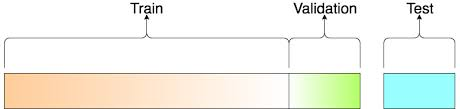

<div class="alert alert-block alert-warning">
<b>Be Aware:</b> You may need to stratify your split on a particular feature, so that the proportion of a feature's values is the same in your train, validate, and test datasets. You can pass the stratify parameter as an option to your train_test_split.
</div>

```python
from sklearn.model_selection import train_test_split

# Create test dataset

train_validate, test = train_test_split(df, 
                                        test_size=.2, 
                                        random_state=123, 
                                        stratify=df.target)
# Create train and validate datsets

train, validate = train_test_split(train_validate, 
                                   test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.target)

# Take a look at your split datasets

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

```

In [27]:
train_validate, test = train_test_split(titanic_df, test_size=.2, 
                                        random_state=123, 
                                        stratify=titanic_df.survived)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)

In [28]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (498, 13)
validate -> (214, 13)
test -> (179, 13)


___

### **<font color=orange>So What?</font>**

You may **explore individual variables before splitting** your data into train, validate, and test datasets, so that you can look at distributions, identify outliers, Nulls, etc. However, **when looking at interactions of variables**, your data should first be split before you explore. You should also split your data **before** you scale. This is because your validate and test data should remain unseen as much as possible as it is supposed to be unknown at this stage.

*An important component of Data Science is that peers must be able to replicate what you have done to your data, especially if you are going to deploy your model to be used in the future. By splitting your data into train, validate, and test sets early on in the pipeline, you are also confirming that any processing you completed on your train set is repeatable on your validate and test datasets as well as unseen future sets.*

___

### **<font color=green>Now What?</font>**

**Now I can investigate the relationship between two columns.**

Check out more on crosstabs and pivot tables [here](https://medium.com/@yangdustin5/quick-guide-to-pandas-pivot-table-crosstab-40798b33e367).

In [29]:
pd.crosstab(train.sibsp, train.parch)

parch,0,1,2,3,4,5
sibsp,,,,,,
0,315,22,18,0,1,1
1,59,27,5,3,0,2
2,10,7,3,1,0,0
3,1,4,4,0,0,0
4,0,5,3,0,0,0
5,0,0,2,0,0,0
8,0,0,5,0,0,0


___

#### Imputing Techniques

##### `.fillna()`

**Fill null values in a column in your datasets with a constant like 0; reassign to original dataframes.**

```python
train['col'] = train['col'].fillna(0)

validate['col'] = validate['col'].fillna(0)

test['col'] = test['col'].fillna(0)
```

___

**Fill null values in a column with the overall average from the training data.**

In [30]:
#Calculate our fill value using train dataset only.

avg_age = train.age.mean()

# Fill null values in all of our datasets using our hardcoded value.

train.age = train.age.fillna(avg_age)

validate.age = validate.age.fillna(avg_age)

test.age = test.age.fillna(avg_age)

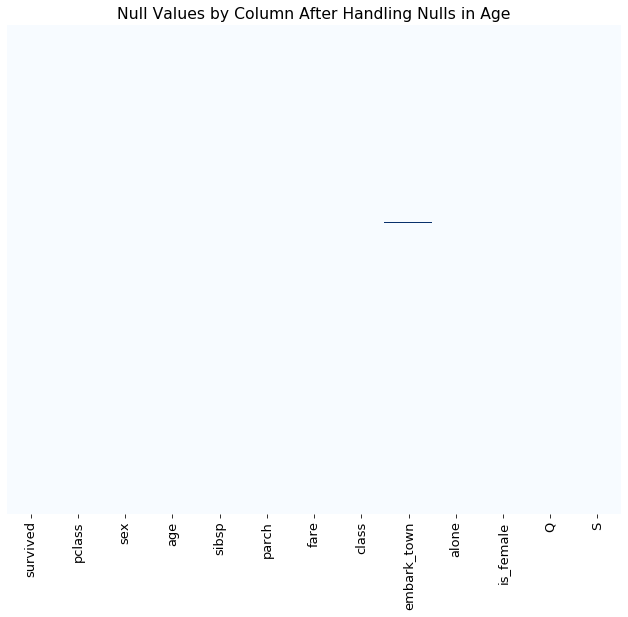

In [31]:
# Validate that our fill was successful.

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column After Handling Nulls in Age')
plt.show()

___

##### `.SimpleImputer()`

We can also use some more sophisticated techniques using sklearn. **Sklearn's SimpleImputer ONLY works on numeric columns.**

**Create the imputer; pick your strategy.**

```python
from sklearn.impute import SimpleImputer

imputer = sklearn.impute.SimpleImputer(strategy='mean')
```

**Fit the imputer to train dataframe.**

```python
imputer = imputer.fit(train[['column']])
```

**Use the Imputer on train, validate, and test dataframes and reassign to dataframes.**

```python
train[['column']] = imputer.transform(train[['column']])

validate[['column']] = imputer.transform(validate[['column']])

test[['column']] = imputer.transform(test[['column']])
```

___

##### What if our missing values are in a categorical column?

Here's one way you could handle this if without dropping observations.

```python
cat_mode = train['Label'].value_counts().index[0]

train['cat_column'] = train['cat_column'].fillna(cat_mode)

validate['cat_column'] = validate['cat_column'].fillna(cat_mode)

test['cat_column'] = test['cat_column'].fillna(cat_mode)
```

In [32]:
train['embark_town'].isnull().sum()

1

In [33]:
# Establish the mode categorical value using the train dataset.

embark_mode = train['embark_town'].value_counts().index[0]
embark_mode

'Southampton'

**Fill null values in `embark_town` in all datasets with `embark_mode` value; reassign to dataframes.**

In [34]:
train['embark_town'] = train['embark_town'].fillna(embark_mode)
validate['embark_town'] = validate['embark_town'].fillna(embark_mode)
test['embark_town'] = test['embark_town'].fillna(embark_mode)

In [35]:
# Validate our fill on train dataset.

train['embark_town'].isnull().sum()

0

___

#### Encoding Techniques AFTER Splitting

##### `LabelEncoder()` 

**Create the Encoder Object.**

```python
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
```

**Fit and Transform train dataset and reassign.**

```python
train['col'] = le.fit_transform(train.col_to_encode)
```

**Transform validate and test datasets and reassign.**

```python
validate['col'] = le.transform(validate.col_to_encode)

test['col'] = le.transform(test.col_to_encode)
```

**Decode Your Encoded Column.**

```python
train['col'] = le.inverse_transform(train.col_to_decode)

validate['col'] = le.inverse_transform(validate.col_to_decode)

test['col'] = le.inverse_transform(test.col_to_decode)
```

___

##### `OneHotEncoder()`

**Create the OHE Object.**

```python
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, categories='auto')
```

**Fit and Transform train to create an array of values.**

```python
train_matrix = ohe.fit_transform(train[['col']])
```

**Transform validate and test to create arrays of values.**
```python
validate_matrix = ohe.transform(validate[['col']])

test_matrix = ohe.transform(test[['col']])
```

**Convert Arrays to dataframes of Encoded Columns.**

```python
train_ohe = pd.DataFrame(train_matrix, columns=ohe.categories_[0], index=train.index)

validate_ohe = pd.DataFrame(validate_matrix, columns=ohe.categories_[0], index=validate.index)

test_ohe = pd.DataFrame(test_matrix, columns=ohe.categories_[0], index=test.index)
```

**Join Your dataframes of Encoded Columns to your original dataframes.**

```python
train = train.join(train_ohe)

validate = validate.join(validate_ohe)

test = test.join(test_ohe)
```

<hr style="border-top: 10px groove dodgerblue; margin-top: 1px; margin-bottom: 1px"></hr>

## Explore

<hr style="border-top: 10px groove dodgerblue; margin-top: 1px; margin-bottom: 1px"></hr>

![image.png](https://www.cambridgemaths.org/Images/E29-exploratory-data-analysis.jpg)

### **<font color=red>What is EDA (Exploratory Data Analysis)?</font>**

Exploratory Data Analysis involves learning more about the data you're working with. One reason to perform EDA is to visualize parts of the data to better understand the correlation between the features and the target.

**The preparation for your dataset for exploration may not be the same as the prepartion of your dataset for modeling.** The requirements of Machine Learning algorithms do not always overlap with the requirements for good data visualization or exploration.

___

### **<font color=orange>So What Types of Viz are best for exploring categorical vs continuous data?</font>**

How do you decide what chart to use? Should you aggregate your data to get a better view? Are you making a comparison or showing a relationship between variables? Do you want to display the distribution or composition of your dataset? These are important questions to ask yourself when deciding on types of chart to use and data aggregations for exploration.

Read more about how to choose a chart [here](https://eazybi.com/blog/data_visualization_and_chart_types/).

![image](https://www.mymarketresearchmethods.com/wp-content/uploads/2013/01/chart-types-choosing-the-right-one.png)

**Glossary for Matplotlib Figures**

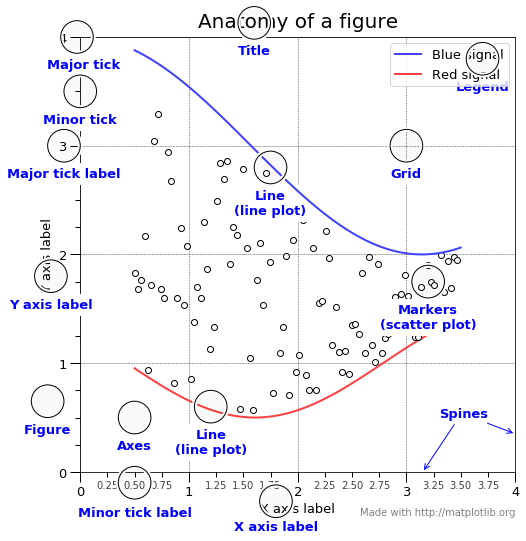

In [36]:
anatomy_of_a_figure()

___

##### `plt.rc()`

Set uniform chart and font sizes at the top of your notebook if you like.

```python
plt.rc('figure', figsize=(num, num))

plt.rc('font', size=num)
```

___

##### Subplots Using Simple pyplot Code

```python
# figure 1 of 2; everything up until the next subplot is on the first plot
plt.subplot(211) # (2 rows, 1 column, plot 1)

plt.plot(x, y)

plt.show()

# figure 2 of 2
plt.subplot(212) # (2 rows, 1 column, plot 2)

plt.plot(y, x)

plt.show()
```

___

##### Subplots Using Matplotlib Object-Oriented API

A figure in matplotlib is divided into two different objects:

- The Figure Class: It can contain one or more axes objects.

- The Axes Object: It represents one plot inside of a figure object.

```python
# create figure and axes -> subplots(nrows, ncols)

fig, axes = plt.subplots(2,1)

# plot 1 of 2
axes[0].plot(x, y)

# set components of axes 1/plot 1
axes[0].set(title='My Title')

# plot 2 of 2
axes[1].plot(y, x)

# set components of axes 2/plot 2
axes[1].set(title='My Title')

# manipulate labels of x-ticks
axes[1].set_xticklabels()

# auto-adjust layout
fig.tight_layout()
```

___

### <font color=green>Now What?</font>

**Below is a collection of some possibilities for exploring categorical and continuous values.** 

If you want more, check out [this article](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/) showing 50 amazing matplotlib visualizations with code. It's organized by purpose of visualization objective, so it's easy to navigate, too.

___

#### Univariate Exploration

When exploring one variable at a time, it is not necessary to split your data first. This might even be something you do very early on in acquiring or preparing your data. I'm using the train dataset here for ease of demonstration in a modular notebook. Once you begin bi- and multivariate exploration to look at relationships between variables, you **must** split your data first, and use your train dataset to keep your unseen data in validate and test unseen.

##### `plt.hist()`

Visualize the distribution of a single variable.

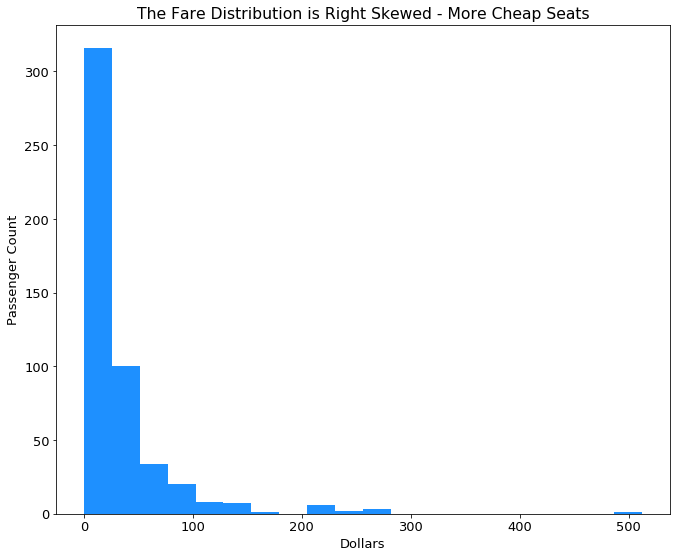

In [37]:
plt.hist(train.fare, bins=20, color='dodgerblue')

plt.title('The Fare Distribution is Right Skewed - More Cheap Seats')
plt.xlabel('Dollars')
plt.ylabel('Passenger Count')
plt.show()

___

##### `sns.countplot()`

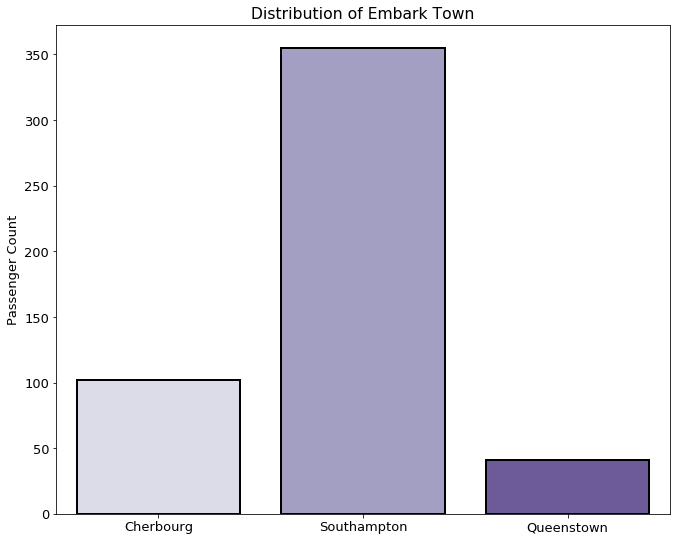

In [38]:
sns.countplot(x = 'embark_town', data=train, palette='Purples', ec='black', linewidth=2)

plt.title('Distribution of Embark Town')
plt.xlabel('')
plt.ylabel('Passenger Count')

plt.show()

___

##### `sns.displot()`

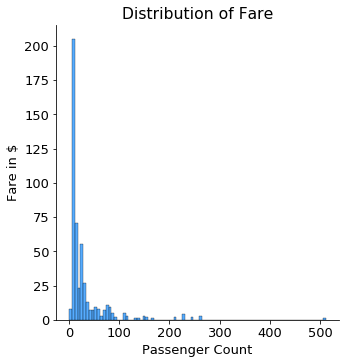

In [39]:
sns.displot(train.fare, color='dodgerblue')

plt.title('Distribution of Fare')
plt.xlabel('Passenger Count')
plt.ylabel('Fare in $')

plt.show()

##### Univariate - `sns.boxplot()`

![Boxplots Explained](https://i.pinimg.com/originals/e9/f0/9f/e9f09ffbc346ebc6a3dfed66408c11ab.png)

[source](https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/)

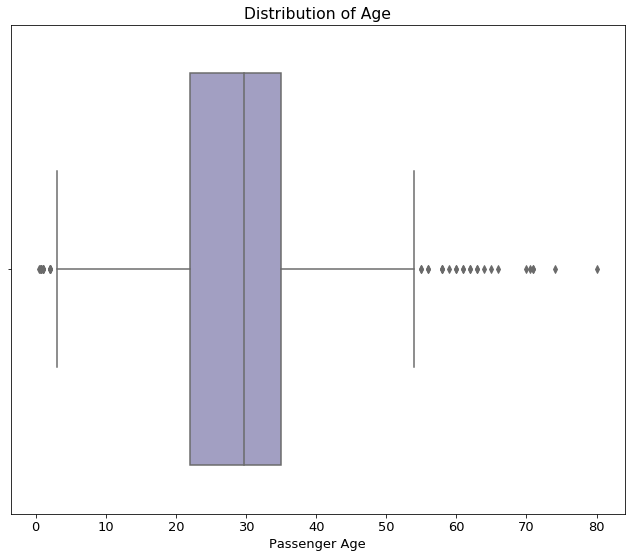

In [40]:
sns.boxplot(x=train.age, palette='Purples')

plt.title('Distribution of Age')
plt.xlabel('Passenger Age')

plt.show()

___

##### Univariate - `sns.scatter()` 

This is another way to examine a distribution of a variable. I could easliy bring in the hue argument and make this bivariate exploration.

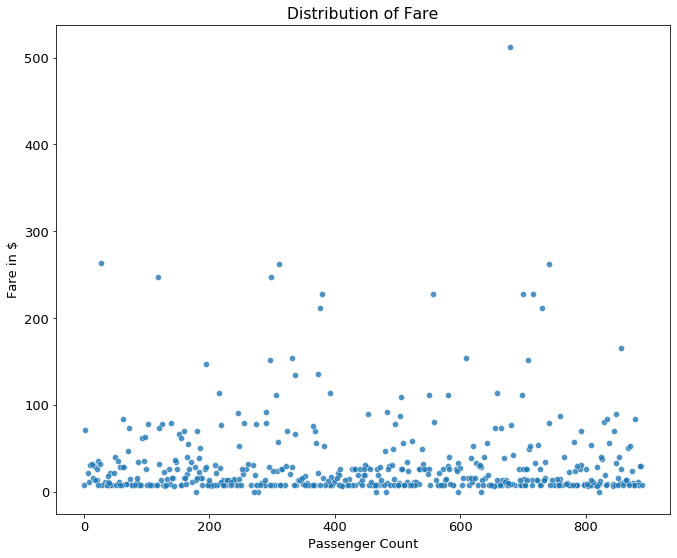

In [41]:
import matplotlib.ticker as ticker

sns.scatterplot(train.index, train.fare, alpha=.8)

plt.title('Distribution of Fare')
plt.xlabel('Passenger Count')
plt.ylabel('Fare in $')

plt.show()

___

___

##### Univariate - `sns.swarmplot()`

This is another way to examine a distribution of a variable. I could easliy bring in the `hue` argument and make this bivariate exploration.

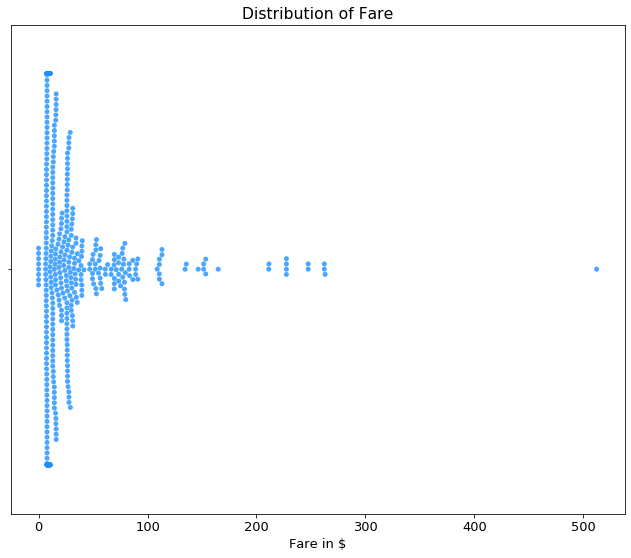

In [42]:
sns.swarmplot(x=train.fare, color='dodgerblue', alpha=.8)

plt.title('Distribution of Fare')
plt.xlabel('Fare in $')

plt.show()

___

#### Bivariate & Multivariate Exploration

Once you begin bi- and multivariate exploration to look at relationships between variables, you **must** split your data first, and use your train dataset to keep your unseen data in validate and test unseen. Bivariate and multivariate analyses use dependent variables to explain independent variables. "Bivariate and multivariate analyses are statistical methods to investigate relationships between data samples. Bivariate analysis looks at two paired data sets, studying whether a relationship exists between them. Multivariate analysis uses two or more variables and analyzes which, if any, are correlated with a specific outcome. The goal in the latter case is to determine which variables influence or cause the outcome." [source](https://sciencing.com/advantages-disadvantages-multiple-regression-model-12070171.html)

##### `sns.pairplot()` & `sns.pairgrid()`

These two seaborn plotting methods allow you to see a lot quickly.

[source of code](https://stackoverflow.com/questions/34087126/plot-lower-triangle-in-a-seaborn-pairgrid)

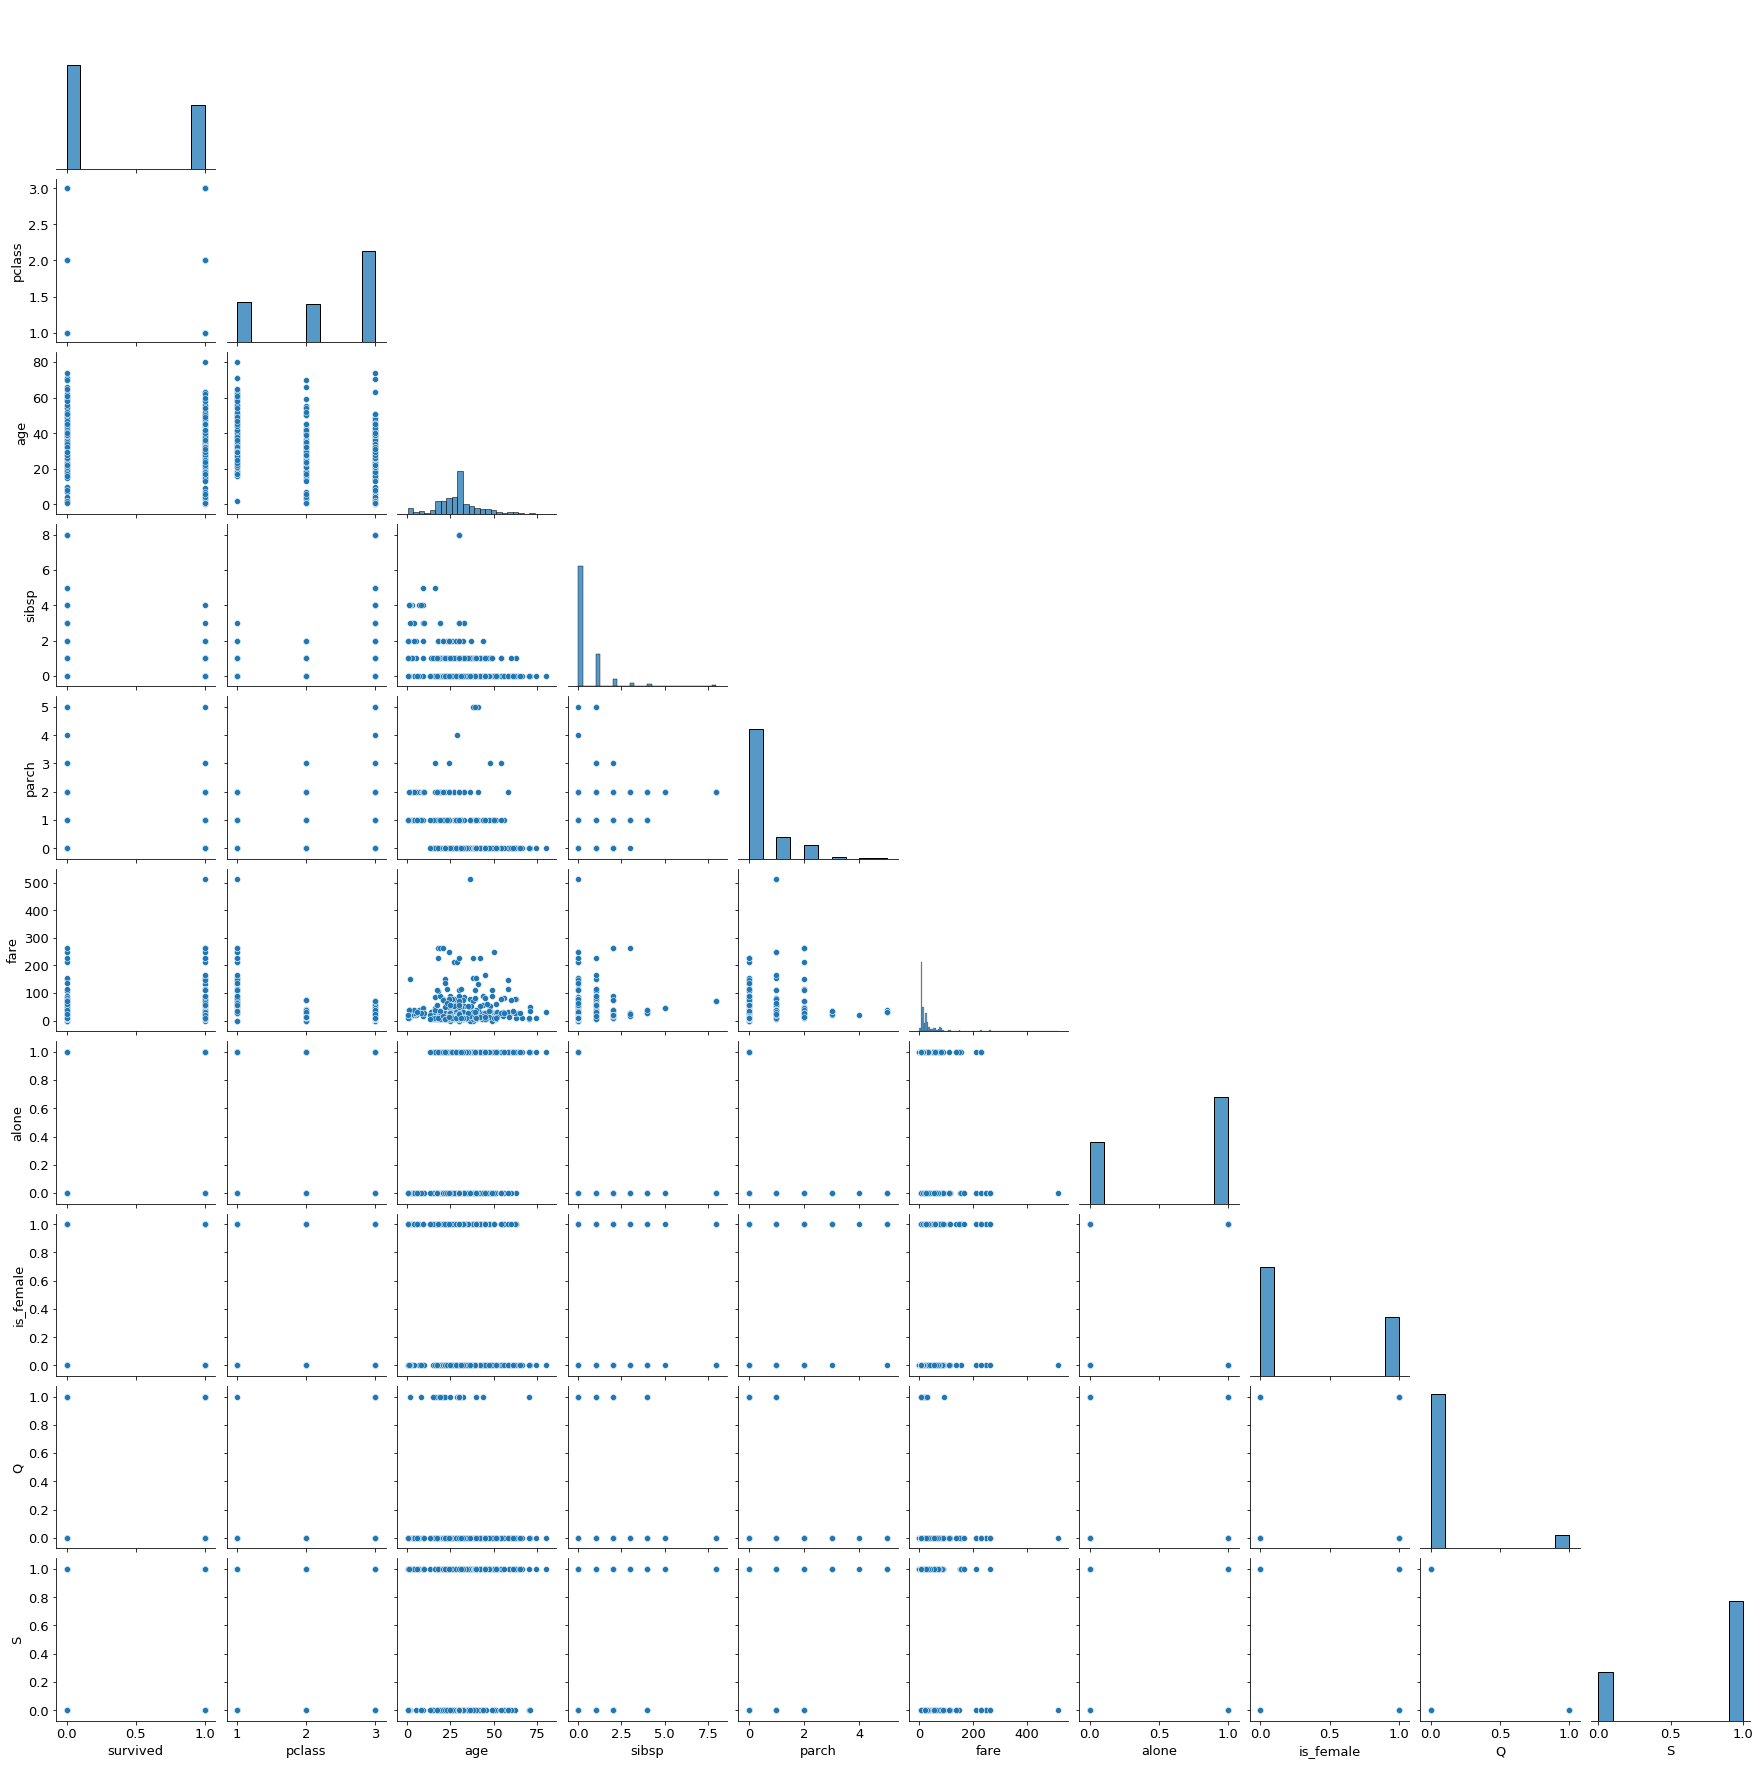

In [43]:
sns.pairplot(data=train, corner=True)

plt.show()

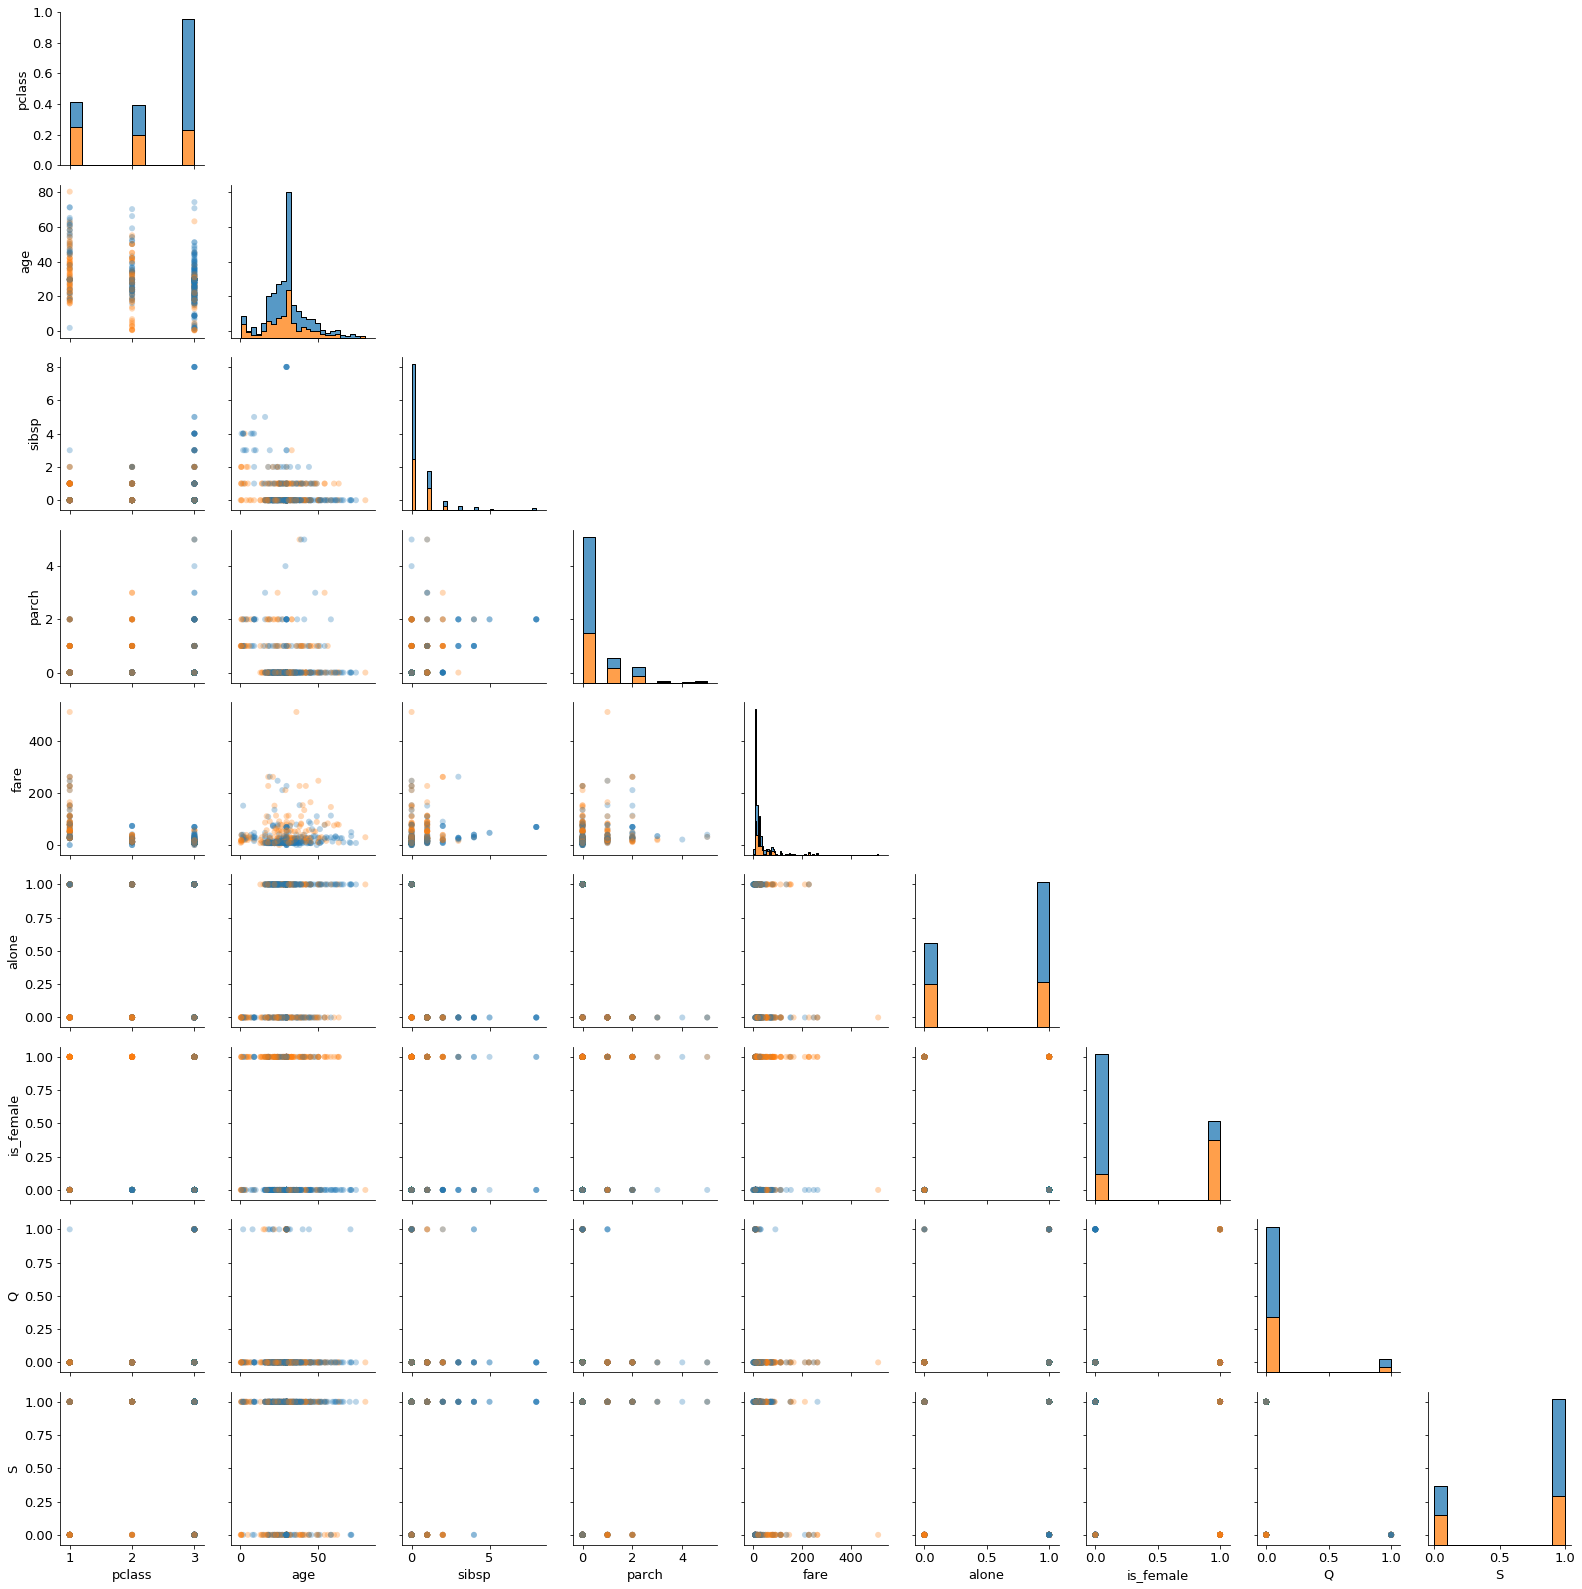

In [44]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

g = sns.PairGrid(train, hue='survived', diag_sharey=False)
g.map_lower(sns.scatterplot, alpha=0.3, edgecolor='none')
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_upper(hide_current_axis)

plt.show()

___

##### subplots `.hist()`

Histogram Subplots to View Distribution of Fare by Survival Status.

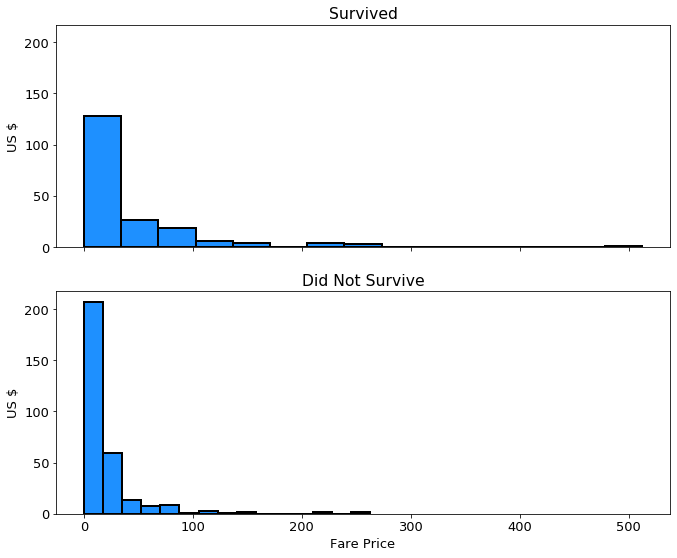

In [45]:
# Create figure and axes, 2 rows and 1 column, share x and y axes.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

# Plot first histogram from survived subset, fare variable.
ax1.hist(train[train.survived == 1].fare, bins=15, 
         color='dodgerblue', ec='black', linewidth=2)

ax1.set(title='Survived', ylabel='US $')

# Plot second historgram from did not survive subset, fare variable.
ax2.hist(train[train.survived == 0].fare, bins=15, 
         color='dodgerblue', ec='black', linewidth=2)

ax2.set(title='Did Not Survive', xlabel='Fare Price', ylabel='US $')

plt.show()

___

##### subplots `sns.countplot()` 

Compare Categorical Values in `Embarked` by survival status using subplot Barplots.

In [46]:
train.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,is_female,Q,S
583,0,1,male,36.0,0,0,40.125,First,Cherbourg,1,0,0,0


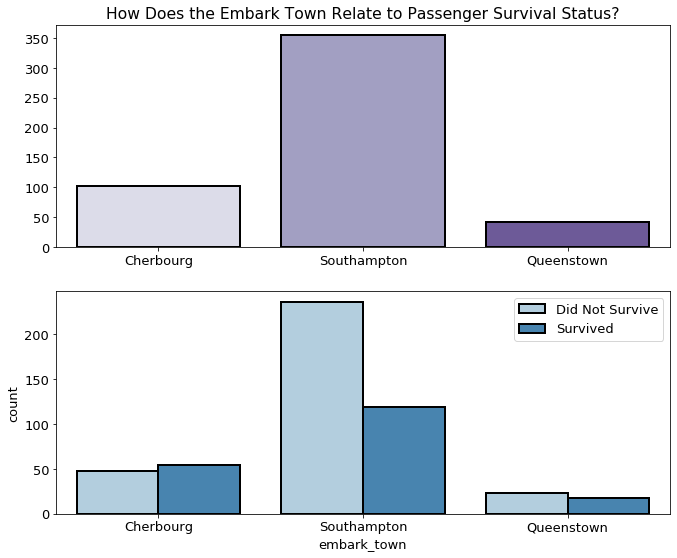

In [47]:
plt.subplot(211)

sns.countplot(x = 'embark_town', data=train, palette='Purples', ec='black', linewidth=2)

plt.title('How Does the Embark Town Relate to Passenger Survival Status?')
plt.xlabel('')
plt.ylabel('')

plt.subplot(212)

# use hue to add another dimension to your viz
sns.countplot(x = 'embark_town', hue = 'survived', data=train, palette='Blues', ec='black', linewidth=2)

plt.legend(['Did Not Survive', 'Survived'])

plt.show()

___

##### `sns.scatter()`

We can look for correlation between two continuous variables; hue allows us to bring in a categorical variable here as well.

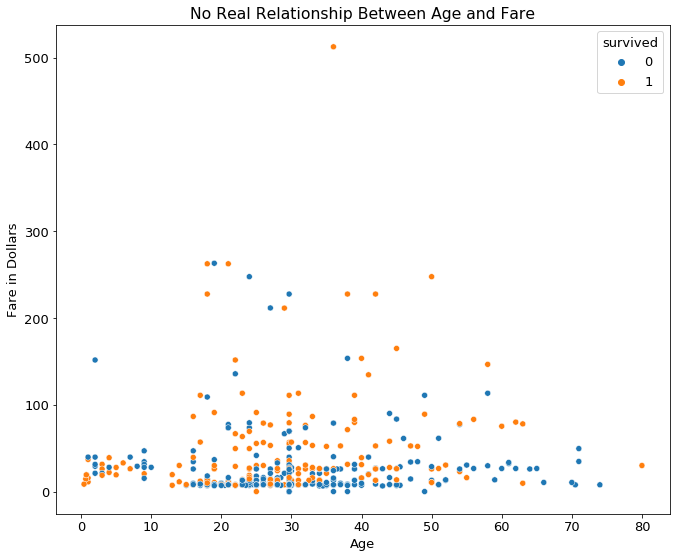

In [48]:
sns.scatterplot(x='age', y='fare', data=train, hue='survived')
plt.title('No Real Relationship Between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare in Dollars')

plt.show()

___

##### `sns.catplot()`

We can use a seaborn catplot to explore a continuous and a categorical variable; hue allows me to bring in another categorical variable.

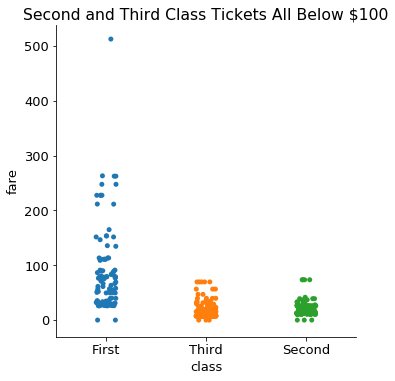

In [49]:
sns.catplot(x='class', y='fare', data=train)

plt.title('Second and Third Class Tickets All Below $100')
plt.show()

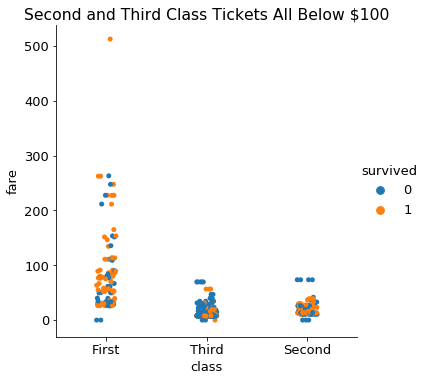

In [50]:
# Bring in a third dimension using the hue argument.

sns.catplot(x='class', y='fare', hue='survived', data=train)

plt.title('Second and Third Class Tickets All Below $100')
plt.show()

___

##### `sns.lmplot()`

We can check for a linear fit between two continuous variables; fare and age are the ones we can practice with here. We can even bring in another dimension using the `col` or `hue` arguments.

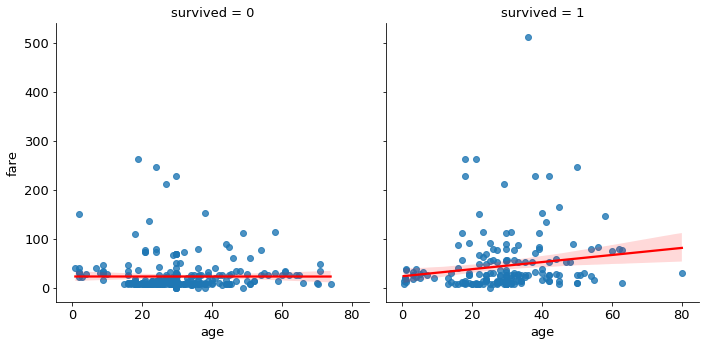

In [51]:
sns.lmplot(x='age', y='fare', data=train, col='survived', line_kws={'color': 'red'})

plt.tight_layout()
plt.show()

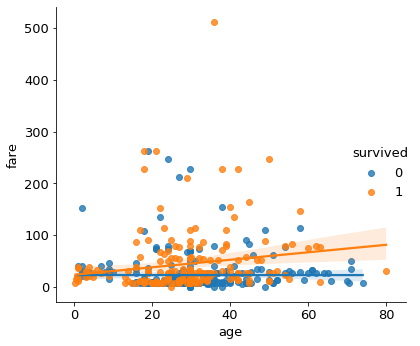

In [52]:
sns.lmplot(x='age', y='fare', data=train, hue='survived')

plt.tight_layout()
plt.show()

___

##### `sns.boxplot()`

Boxplots to show Distribution of Age by Sex and Survival

```python
sns.boxplot(x='categorical', y='continous', data=train , hue='categorical')
```

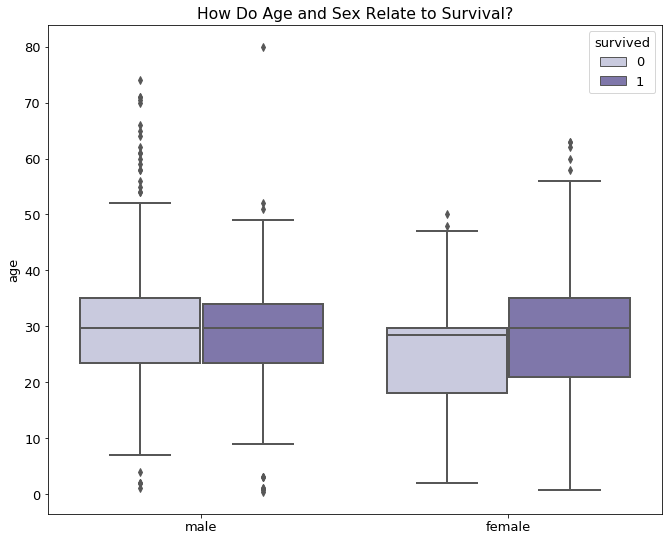

In [53]:
sns.boxplot(x='sex', y='age', data=train, hue='survived', palette='Purples', linewidth=2)

plt.title('How Do Age and Sex Relate to Survival?')
plt.xlabel('')
plt.show()

___

##### `sns.swarmplot()`

Swarmplots to show Distribution of a Continuous Variable grouped by a Categorical Variable. Hue brings in a third dimension.

```python
sns.swarmplot(x='categorical', y='continous', data=train , hue='categorical'  )
```

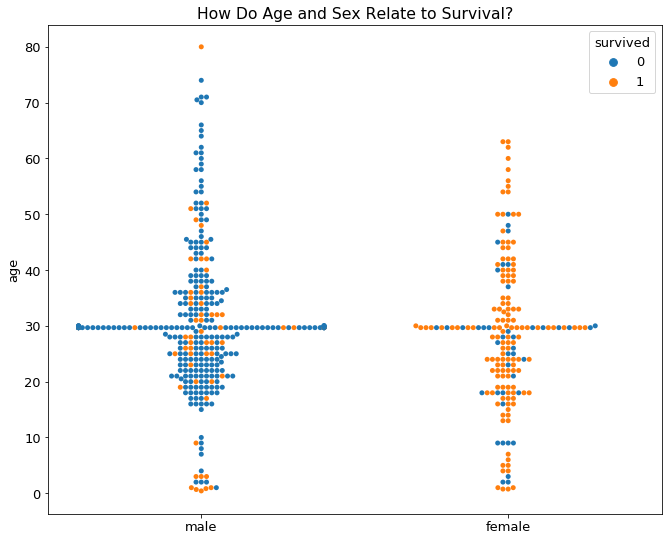

In [54]:
sns.swarmplot(x='sex', y='age', data=train , hue='survived'  )

plt.title('How Do Age and Sex Relate to Survival?')
plt.xlabel('')
plt.show()

___

##### `sns.violinplot()`

Violinplots are Similar to Boxplots.

```python
sns.violinplot(x='categorical', y='continous', data=train , hue='categorical'  )
```

![Violinplots Explained](https://i.pinimg.com/564x/52/a4/5b/52a45b80a943be80f89e747c719fe4ea.jpg)

[source](https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/)

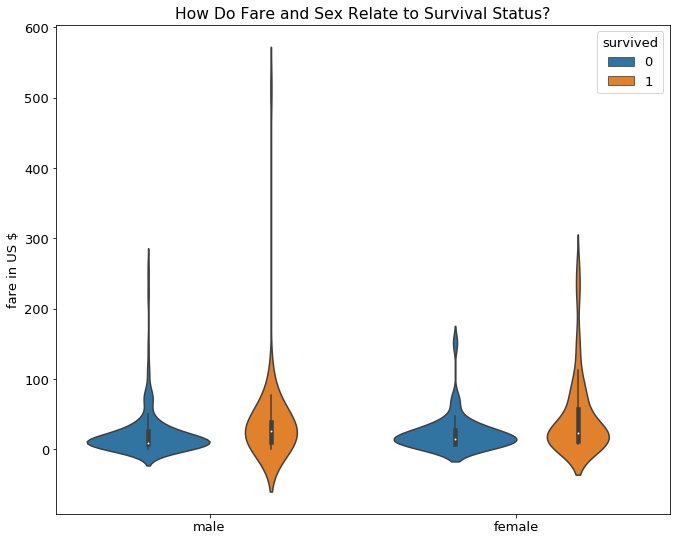

In [55]:
sns.violinplot(x='sex', y='fare', data=train , hue='survived'  )

plt.title('How Do Fare and Sex Relate to Survival Status?')
plt.xlabel('')
plt.ylabel('fare in US $')

plt.show()

___

##### `pd.crosstab` with `sns.heatmap()`

Crosstab with Heatmap to Group Variables and Visualize Correlations.

See lots of formatting options [here](https://likegeeks.com/seaborn-heatmap-tutorial/).

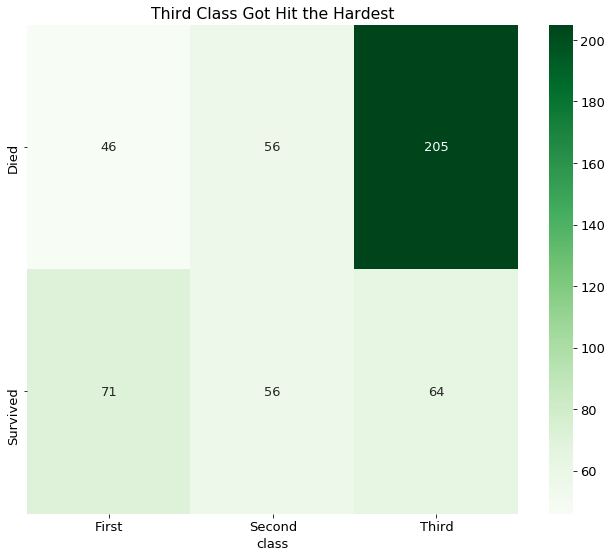

In [56]:
# Create crosstab with raw values.
ctab = pd.crosstab(train.survived, train['class'])

# Use crosstab object in a heatmap to visualize values.
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='d')

plt.title('Third Class Got Hit the Hardest')
plt.ylabel('')

# Change labels for y-tick marks.
locs, labels = plt.yticks()
plt.yticks(locs, ('Died', 'Survived'))

plt.show()

**Inspect percentages of overall population**

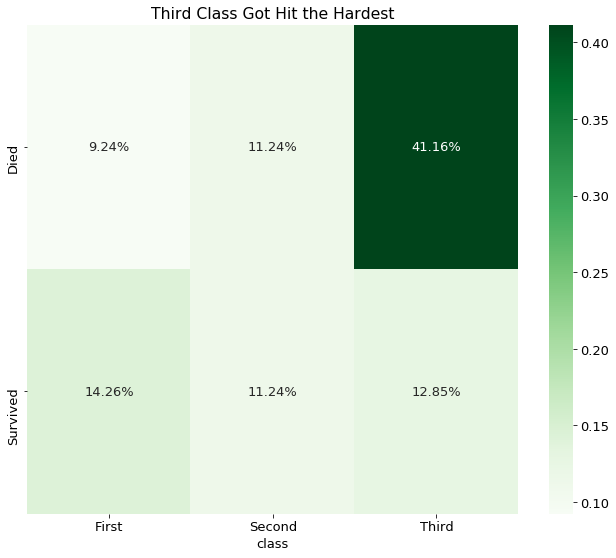

In [57]:
# Create crosstab with values as percentages of overall population
ctab = pd.crosstab(train.survived, train['class'], normalize=True)

# Use crosstab object in a heatmap to visualize values.
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.2%')

plt.title('Third Class Got Hit the Hardest')
plt.ylabel('')

# Change labels for y-tick marks.
locs, labels = plt.yticks()
plt.yticks(locs, ('Died', 'Survived'))


plt.show()

**Remove Number Annotations & Inspect percentages of overall population**

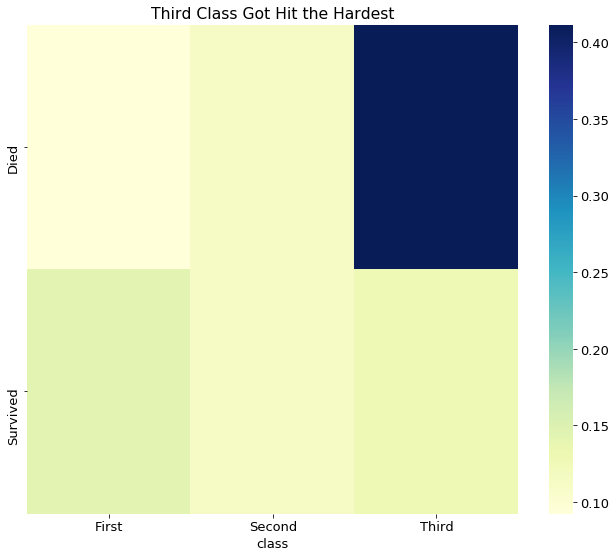

In [58]:
# Create crosstab with values as percentages of overall population
ctab = pd.crosstab(train.survived, train['class'], normalize=True)

# Use crosstab object in a heatmap to visualize values.
sns.heatmap(ctab, annot=False, cmap="YlGnBu", fmt='.2%')

plt.title('Third Class Got Hit the Hardest')
plt.ylabel('')

# Change labels for y-tick marks.
locs, labels = plt.yticks()
plt.yticks(locs, ('Died', 'Survived'))


plt.show()

___

##### `.groupby()`

**Use a Groupby to Explore Different Aggregations of Your Data.**

The `.groupby()` here creates a Series with an index containing the categories present in the `Survived` column and the average fare price for each index category. 

>To inspect percentages by group, set `normalize=True`.

In [59]:
train.groupby('survived').fare.mean()

survived
0    22.953323
1    44.272688
Name: fare, dtype: float64

**Adding `.plot(kind='barh')` turns the index of your groupby into ylabels and the values into bar lengths.**

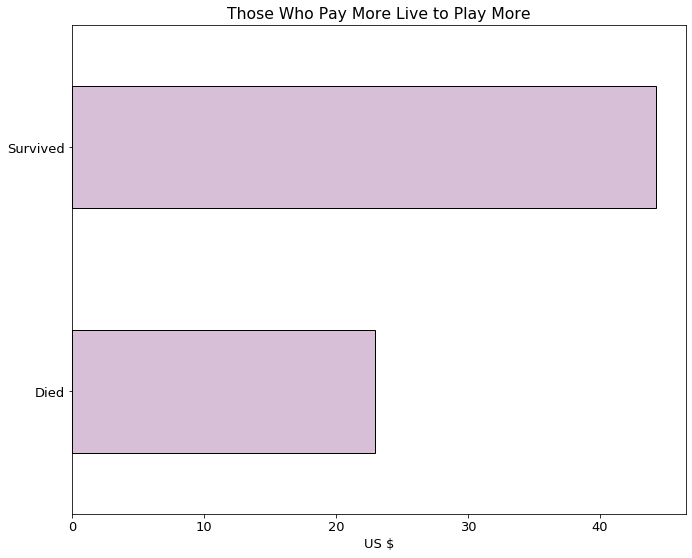

In [60]:
# Plot your groupby object quickly.
train.groupby('survived').fare.mean().plot(kind='barh', color='thistle', ec='black')

plt.title('Those Who Pay More Live to Play More')

locs, labels = plt.yticks()
plt.yticks(locs, ('Died', 'Survived'))
plt.ylabel('')
plt.xlabel('US $')

plt.show()

___

**Below is such a useful code snippet to put in your back pocket!** I'll build the final product up step-by-step, so you have a better understanding of how the code works.

In [61]:
# Get a frequency table for class grouped by embark town.

train.groupby('embark_town')['class'].apply(lambda s: s.value_counts(normalize=True))

embark_town        
Cherbourg    First     0.549020
             Third     0.362745
             Second    0.088235
Queenstown   Third     0.975610
             First     0.024390
Southampton  Third     0.540845
             Second    0.290141
             First     0.169014
Name: class, dtype: float64

In [62]:
# Turn the multi-level index into columns using the .unstack() method.

train.groupby('embark_town')['class'].apply(lambda s: s.value_counts(normalize=True)).unstack()  

,First,Second,Third
embark_town,,,
Cherbourg,0.549020,0.088235,0.362745
Queenstown,0.024390,NaN,0.975610
Southampton,0.169014,0.290141,0.540845


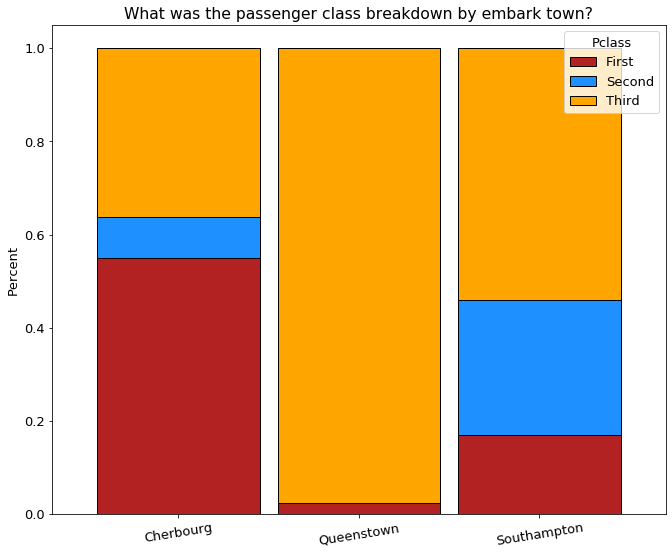

In [63]:
# Plot the above table
(
train.groupby('embark_town')['class'].apply(lambda s: s.value_counts(normalize=True))
    .unstack()                                        
    .plot.bar(stacked=True, 
              width=.9, 
              color=['firebrick', 'dodgerblue', 'orange'], 
              ec='black')                 
)

plt.title('What was the passenger class breakdown by embark town?')

plt.xticks(rotation=9)
plt.xlabel('')
plt.ylabel('Percent')

plt.legend(title='Pclass')

plt.show()

___

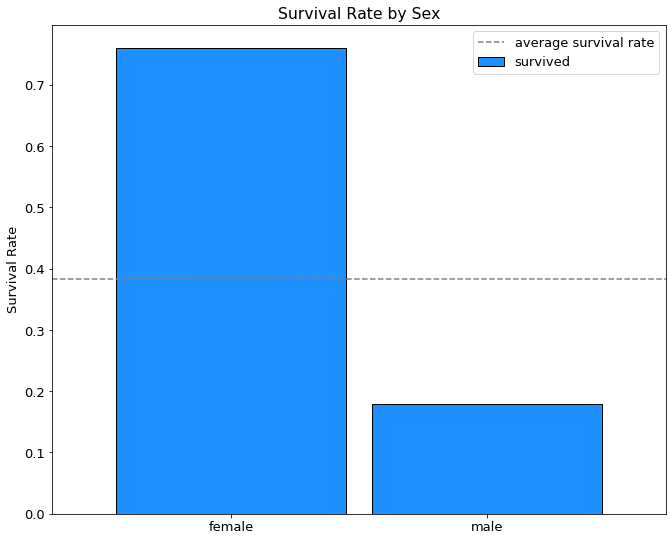

In [64]:
train.groupby('sex').survived.mean().plot.bar(ec='black', fc='dodgerblue', width=.9)

# Create our horizontal line -> plt.hlines(height, starts, ends) (is like y, xmin, xmax)
plt.hlines(train.survived.mean(), *plt.xlim(), ls='--', color='grey', label='average survival rate')

plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Survival Rate')

plt.title('Survival Rate by Sex')
plt.legend()
plt.show()

___

##### `pd.crosstab()` and `pd.pivot_table()` with `sns.heatmap()`

Exploring 2 Different Categorical Values - Survival Rate for Class by Sex.

In [65]:
# This table gives the total female or male passengers in each class.

train.groupby(['class', 'sex']).survived.count().unstack()

sex,female,male
class,,
First,48,69
Second,46,66
Third,81,188


In [66]:
# This table gives the total female or male passengers who survived in each class.

train.groupby(['class', 'sex']).survived.sum().unstack()

sex,female,male
class,,
First,46,25
Second,44,12
Third,43,21


In [67]:
# This table gives us the survival rate for female or male passengers in each class.

train.groupby(['class', 'sex']).survived.mean().unstack()

sex,female,male
class,,
First,0.958333,0.362319
Second,0.956522,0.181818
Third,0.530864,0.111702


In [68]:
# We can create the table above in this way, too. 95.8% of first class females survived.

pd.crosstab(train['class'], train.sex, values=train.survived, aggfunc='mean')

sex,female,male
class,,
First,0.958333,0.362319
Second,0.956522,0.181818
Third,0.530864,0.111702


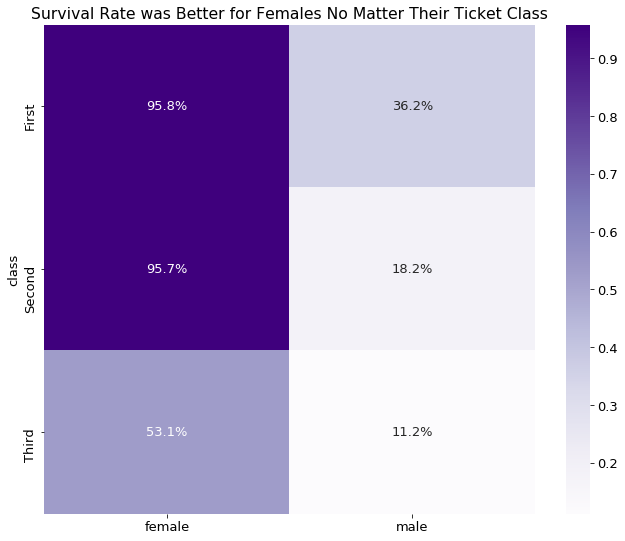

In [69]:
# Let's plot the above table.

ctab = pd.crosstab(train['class'], train.sex, values=train.survived, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.1%')

plt.title('Survival Rate was Better for Females No Matter Their Ticket Class')
plt.xlabel('')

plt.show()

OR
```python
       df.pivot_table(values,  rows,   columns)
 ```

In [70]:
# I can accomplish the same using a pivot table.

table = train.pivot_table('survived', 'class', 'sex')
table

sex,female,male
class,,
First,0.958333,0.362319
Second,0.956522,0.181818
Third,0.530864,0.111702


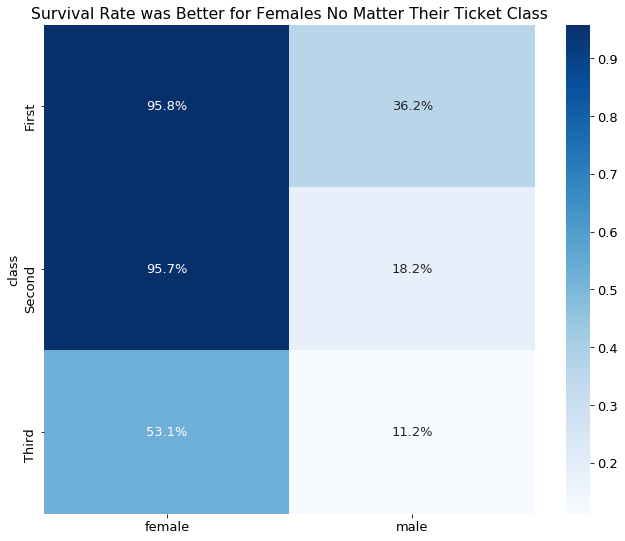

In [71]:
sns.heatmap(table, annot=True, cmap='Blues', fmt='.1%')

plt.title('Survival Rate was Better for Females No Matter Their Ticket Class')
plt.xlabel('')

plt.show()

___

##### `pd.cut()` and `pd.qcut()`

**I can use binning for exploration.** 

```python
# for even intervals but not evenly distributed values in each bin
pd.cut(df.column, bins=[], labels=[])   

# for even number of observations in each interval
pd.qcut(df.column, bins=[], labels=[])
```

Here I turn a continuous variable into a categorical one for visiualizing.

In [72]:
# splits age into 2 bins, 0-12 and 13-80

train['age_group'] = pd.cut(train.age, bins = [0, 12, 80], labels=['child', 'adult'])
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,is_female,Q,S,age_group
583,0,1,male,36.000000,0,0,40.1250,First,Cherbourg,1,0,0,0,adult
165,1,3,male,9.000000,0,2,20.5250,Third,Southampton,0,0,0,1,child
50,0,3,male,7.000000,4,1,39.6875,Third,Southampton,0,0,0,1,child
259,1,2,female,50.000000,0,1,26.0000,Second,Southampton,0,1,0,1,adult
306,1,1,female,29.678105,0,0,110.8833,First,Cherbourg,1,1,0,0,adult


<div class="alert alert-block alert-warning"><b>Remember: </b>If I want to use this new feature, `age_group`, in modeling, I have to perform this same manipulation from above on both validate and test. If I were going to do this, I would build these into my prepare function. If I don't, when I drop this column before modeling, I only need to drop it from my train dataset.</div>

In [73]:
# Now I can check out the survival rate for children and adults.

train.groupby('age_group').survived.mean()

age_group
child    0.542857
adult    0.371490
Name: survived, dtype: float64

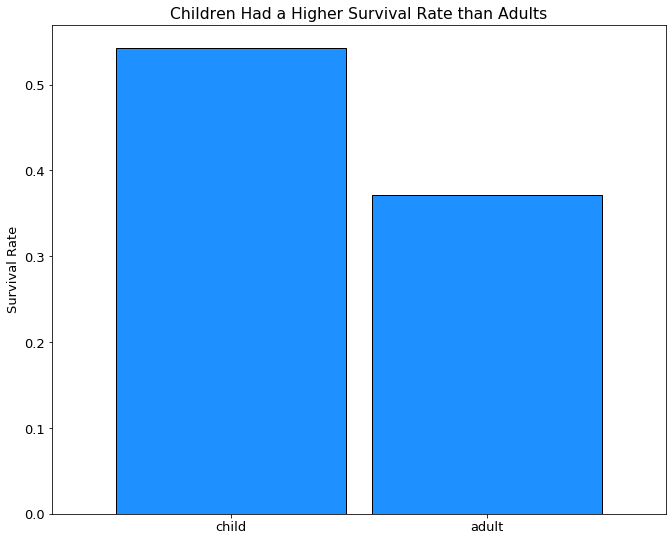

In [74]:
train.groupby('age_group').survived.mean().plot.bar(ec='black', fc='dodgerblue', width=.9)
plt.title('Children Had a Higher Survival Rate than Adults')
plt.xlabel('')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

plt.show()

In [75]:
# I can also inspect both the survival and death rates for children and adults.

train.groupby('age_group').survived.value_counts(normalize=True)

age_group  survived
child      1           0.542857
           0           0.457143
adult      0           0.628510
           1           0.371490
Name: survived, dtype: float64

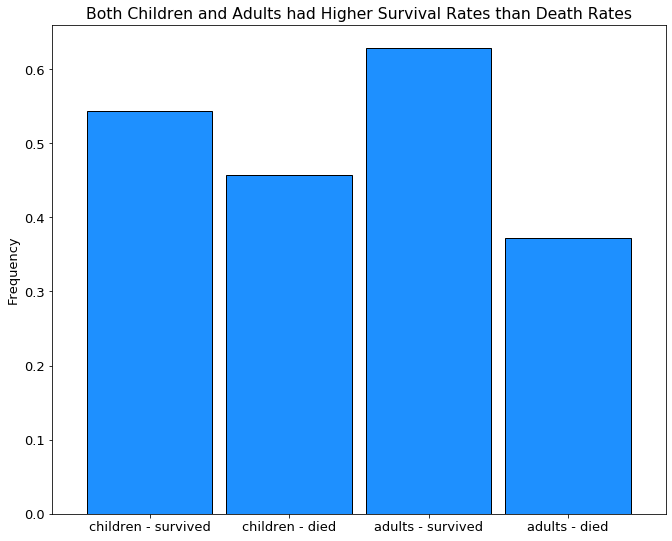

In [76]:
# We can visualize the above code below to understand our data; 
# I would not use this chart for presentations. There are better ways to present this info.

train.groupby('age_group').survived.value_counts(normalize=True).plot.bar(ec='black', 
                                                                          fc='dodgerblue', 
                                                                          width=.9)

plt.title('Both Children and Adults had Higher Survival Rates than Death Rates')
plt.xlabel('')
plt.ylabel('Frequency')

# Get locations for xticks and create new labels for xticks
locs, _ = plt.xticks() 
labels = ['children - survived', 'children - died', 'adults - survived', 'adults - died']

# Set locations and labels
plt.xticks(locs, labels , rotation=0)

plt.show()

___

**There's some pretty cool EDA code and explanation in [this article.](https://towardsdatascience.com/exploratory-data-analysis-for-linear-regression-classification-8a27da23debc) Check it out!**

**Here are the official matplotlib [tutorials](https://matplotlib.org/3.1.1/tutorials/index.html#introductory)**